In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data3 = pd.read_csv("D:/regression_project/Cab_data/Cab_price_clean.csv")
cab_price = data3.copy()

In [36]:
cab_price.head(1)

,index,distance_km,company,drop_location,pickup_location,price,surge,ride_type,temperature,cloud_coverage,pressure,rainfall,humidity,wind_speed,hour,day,mounth,weekday,weekend
0,0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,38.46,0.29,1022.25,0.0,0.76,7.68,9,16,12,6,1


In [37]:
cab_price.describe()

,index,distance_km,price,surge,temperature,cloud_coverage,pressure,rainfall,humidity,wind_speed,hour,day,mounth,weekday,weekend
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,346446.048666,2.189261,16.545125,1.015068,39.222374,0.667874,1010.228828,0.005599,0.747333,6.91641,11.618528,17.797674,11.586550,2.781699,0.262076
std,200059.644995,1.135413,9.324359,0.095422,6.601370,0.313846,13.386430,0.026571,0.128962,3.64836,6.948776,9.982083,0.492452,2.056670,0.439764
min,0.000000,0.020000,2.500000,1.000000,19.620000,0.000000,988.250000,0.000000,0.450000,0.30000,0.000000,1.000000,11.000000,0.000000,0.000000
25%,173190.750000,1.270000,9.000000,1.000000,36.110000,0.430000,999.950000,0.000000,0.650000,3.63000,6.000000,13.000000,11.000000,1.000000,0.000000
50%,346400.000000,2.160000,13.500000,1.000000,40.180000,0.760000,1009.550000,0.000000,0.730000,6.74000,12.000000,17.000000,12.000000,3.000000,0.000000
75%,519730.250000,2.930000,22.500000,1.000000,43.600000,0.960000,1021.880000,0.000000,0.870000,9.88000,18.000000,28.000000,12.000000,5.000000,1.000000
max,693070.000000,7.860000,97.500000,3.000000,55.410000,1.000000,1035.120000,0.274000,0.990000,18.18000,23.000000,30.000000,12.000000,6.000000,1.000000


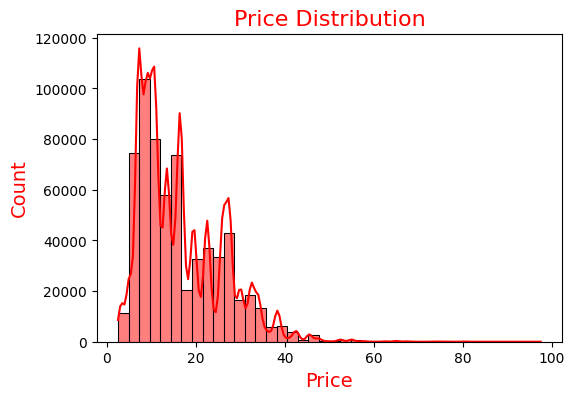

In [38]:
plt.figure(figsize=(6,4))

sns.histplot(cab_price['price'],color ='red', bins=40 ,kde=True)

plt.title('Price Distribution', fontsize=16, color='red')

plt.xlabel('Price', fontsize=14, color='red')

plt.ylabel('Count', fontsize=14, color='red')

plt.show()

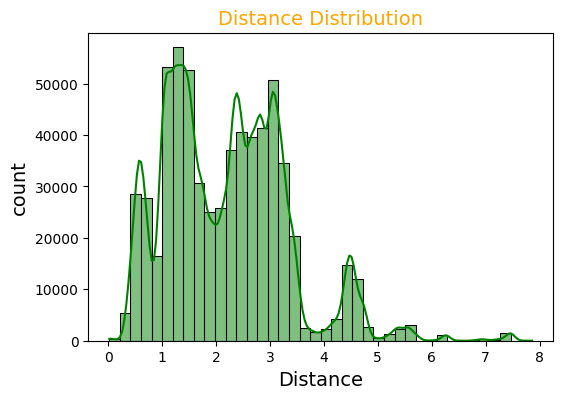

In [39]:
plt.figure(figsize=(6,4))

sns.histplot(cab_price['distance_km'], color='green', bins=40, kde=True)

plt.title('Distance Distribution', fontsize=14, color='orange')

plt.xlabel('Distance', fontsize=14)

plt.ylabel('count', fontsize=14)

plt.show()

C:\Users\Fhaarishhassan\AppData\Local\Temp\ipykernel_25620\2234936851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cab_price['pickup_location'], palette='Set1')


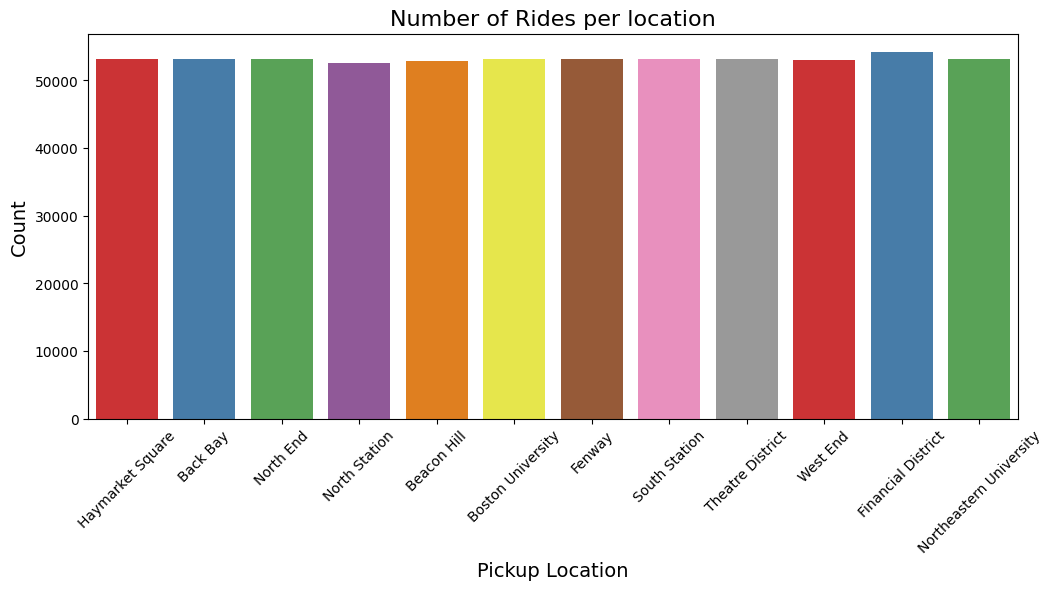

In [40]:
plt.figure(figsize=(12,5))

sns.countplot(x = cab_price['pickup_location'], palette='Set1')

plt.title('Number of Rides per location', fontsize=16)

plt.ylabel('Count', fontsize=14)

plt.xlabel('Pickup Location', fontsize=14)

plt.xticks(rotation=45)

plt.show()

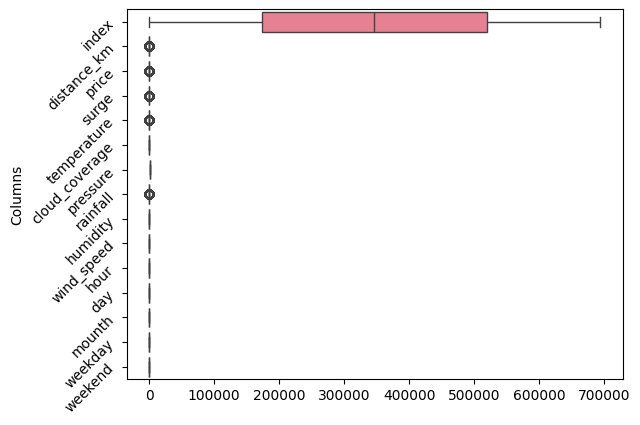

In [41]:
cols = cab_price.select_dtypes(include=['number'])

# Boxplot:
sns.boxplot(data = cols,orient='h')
plt.ylabel("Columns")
plt.yticks(rotation = 45)
plt.show()

In [42]:
outliers_summary = {}

for col in cols:
    Q1 = cols[col].quantile(0.25)
    Q3 = cols[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = cab_price[(cab_price[col] < lower_bound)|(cab_price[col] > upper_bound)][col].count()

    outliers_summary[col] = outliers

outliers_summary

{'index': np.int64(0),
 'distance_km': np.int64(6672),
 'price': np.int64(5589),
 'surge': np.int64(20975),
 'temperature': np.int64(26172),
 'cloud_coverage': np.int64(0),
 'pressure': np.int64(0),
 'rainfall': np.int64(90788),
 'humidity': np.int64(0),
 'wind_speed': np.int64(0),
 'hour': np.int64(0),
 'day': np.int64(0),
 'mounth': np.int64(0),
 'weekday': np.int64(0),
 'weekend': np.int64(0)}

C:\Users\Fhaarishhassan\AppData\Local\Temp\ipykernel_25620\257272604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cab_price['company'], palette='Set2')


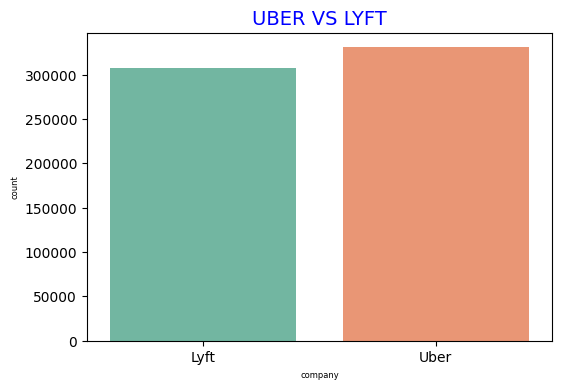

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x = cab_price['company'], palette='Set2')

plt.title('UBER VS LYFT', color='blue', fontsize=14)

plt.xlabel('company', fontsize=6)

plt.ylabel('count', fontsize=6)

plt.show()

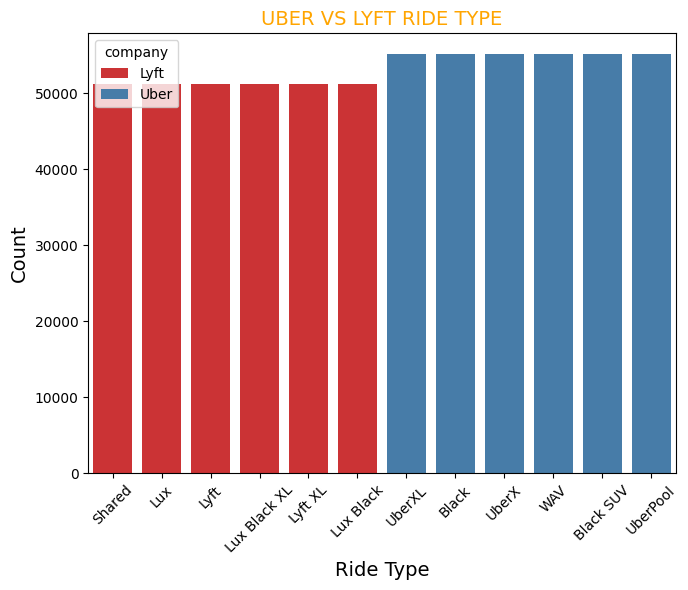

In [44]:
plt.figure(figsize=(7,6))

sns.countplot(data=cab_price,x='ride_type',hue='company',palette='Set1')

plt.title("UBER VS LYFT RIDE TYPE",color = 'orange',loc='center',fontsize = 14)

plt.xlabel("Ride Type",fontsize = 14)

plt.ylabel("Count",fontsize = 14)

plt.xticks(rotation = 45)

plt.legend(loc = 'upper left',title = 'company')

plt.tight_layout()

plt.show()

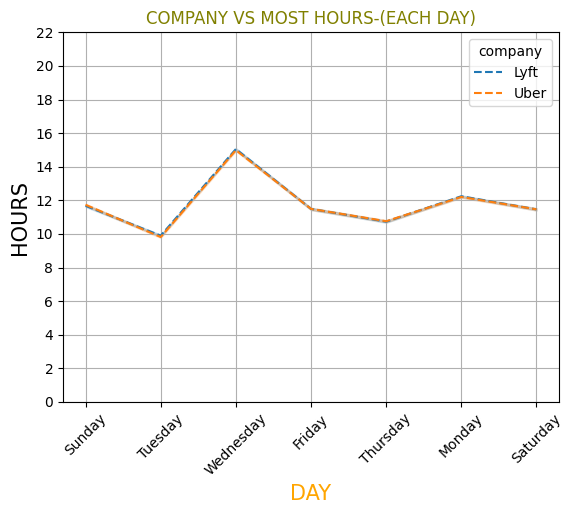

In [45]:
cab_price['day'] = cab_price['weekday'].map({
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
})

sns.lineplot(
    data=cab_price,
    x='day',
    y='hour',
    hue='company',
    linestyle='--',
    color='brown',
)

plt.title("COMPANY VS MOST HOURS-(EACH DAY)",color = 'olive')

plt.xlabel("DAY",fontsize = 15,color = 'orange')

plt.ylabel("HOURS",fontsize = 15)

plt.xticks(rotation = 45)

plt.yticks(range(0,24,2))

plt.grid()

plt.show()


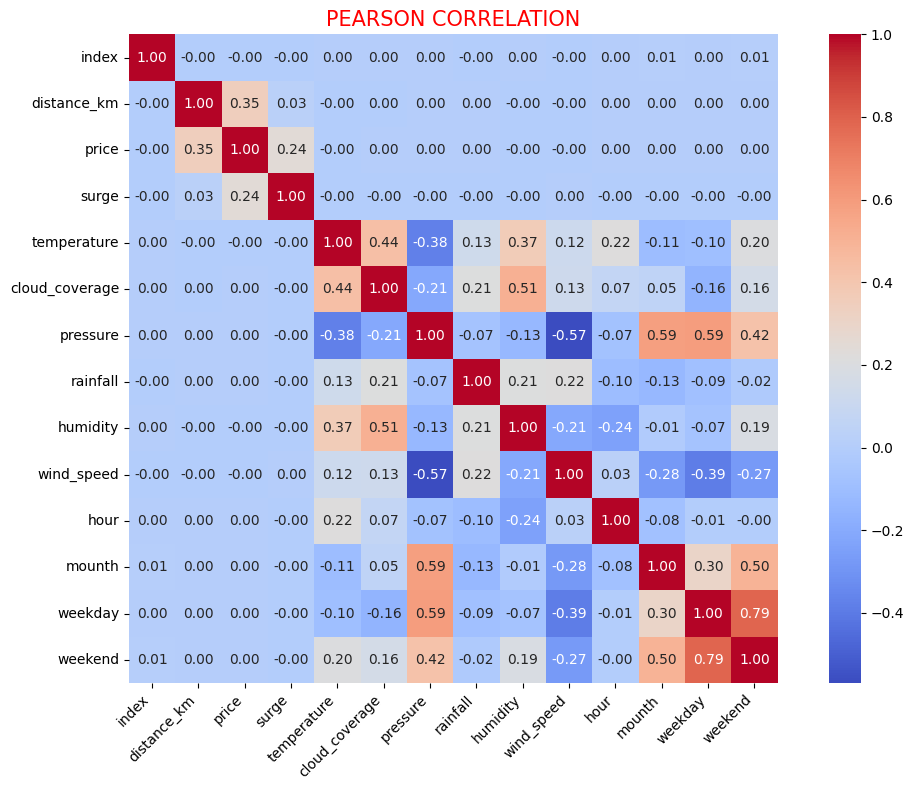

In [46]:
c_cols = cab_price.select_dtypes(include='number')


cor = c_cols.corr(method='pearson')

plt.figure(figsize=(11,8))

sns.heatmap(cor,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            cbar=True,
            square=True)

plt.xticks(rotation=45, ha='right')

plt.yticks(rotation=0)

plt.title("PEARSON CORRELATION",fontsize =15,color= 'red')

plt.tight_layout()
 
plt.show()

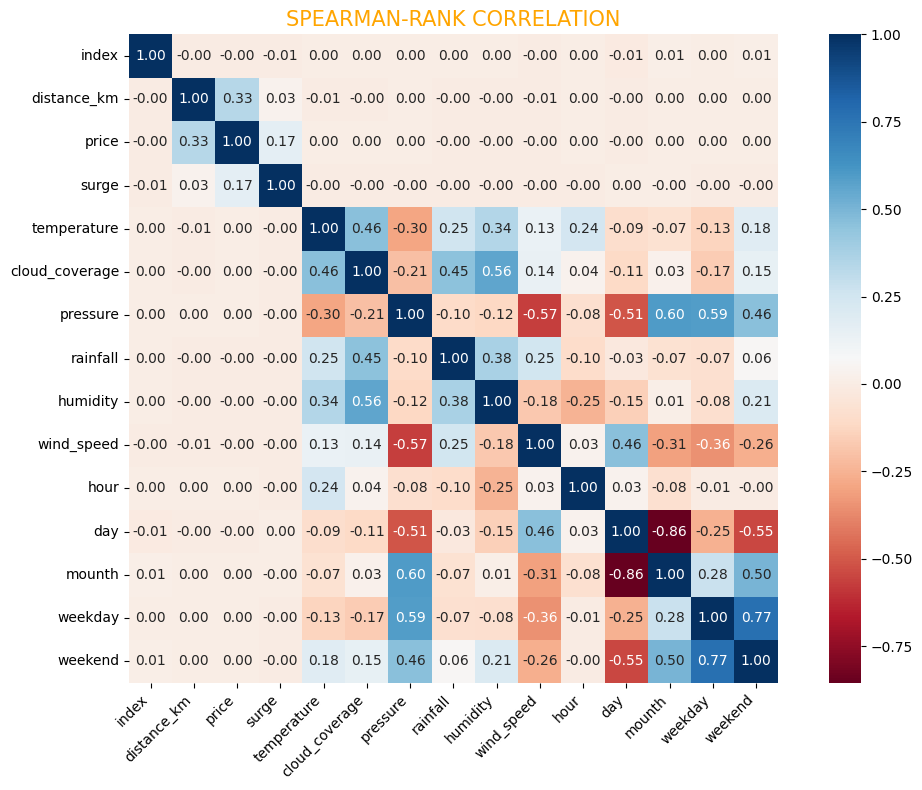

In [47]:
cor1 = cols.corr(method='spearman')

plt.figure(figsize=(11,8))

sns.heatmap(cor1,
            annot=True,
            cmap='RdBu',
            fmt=".2f",
            cbar=True,
            square=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("SPEARMAN-RANK CORRELATION",fontsize =15,color= 'orange')

plt.tight_layout() 
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


c_cols = cab_price.select_dtypes(include='number')


vif_data = pd.DataFrame()
vif_data["feature"] = c_cols.columns
vif_data["VIF"] = [variance_inflation_factor(c_cols.values, i)
                   for i in range(len(c_cols.columns))]

print(vif_data)


           feature          VIF
0            index     3.998935
1      distance_km     5.375165
2            price     5.013854
3            surge   120.807980
4      temperature    57.891381
5   cloud_coverage     9.647647
6         pressure  1870.218843
7         rainfall     1.208112
8         humidity    71.735494
9       wind_speed     6.665348
10            hour     4.856931
11          mounth  1302.549543
12         weekday    15.243655
13         weekend     8.127847
